In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib import rc
import pandas as pd
import geopandas

london_data = pd.read_csv('pay-gaps-london-employers.csv')
uk_data = pd.read_csv('pay-gaps-all-employers.csv')


Reqs for geopandas to work <br>
pip install wheel <br>
pip install pipwin <br>

pipwin install numpy<br>
pipwin install pandas<br>
pipwin install shapely<br>
pipwin install gdal<br>
pipwin install fiona<br>
pipwin install pyproj<br>
pipwin install six<br>
pipwin install rtree<br>
pipwin install geopandas<br>

In [2]:
#uk_data

In [3]:
#uk_data['Address'].value_counts()

In [4]:
uk_data['Address']=uk_data['Address'].str[-8:]

In [5]:
uk_data['Address']=uk_data['Address'].replace('\n','', regex=True)
uk_data['Address']=uk_data['Address'].replace('\r','', regex=True)
uk_data['Address']=uk_data['Address'].replace(',','', regex=True)
uk_data['Address']=uk_data['Address'].replace(' ','', regex=True)



#uk_data['Address']=uk_data['Address'].replace(' ',' ', regex=True)

In [6]:
uk_data['Address']=uk_data['Address'].str[:2]

In [7]:
uk_data['Address']=uk_data['Address'].str.replace('\d+', '')
uk_data['Address'].value_counts()

EC    631
W     470
B     351
SW    289
RG    234
     ... 
cm      1
HM      1
so      1
P       1
Be      1
Name: Address, Length: 164, dtype: int64

# if you want to add more points to graph change next input
this will allow areas with more than (chosen number) compnanies to go through <br>
PS
didnt try below 20, might not work

In [8]:
num_comp_in_area=3

In [9]:
a=pd.DataFrame(uk_data['Address'].value_counts()[uk_data['Address'].value_counts()>num_comp_in_area]).reset_index()

# Preprocessing data for final table

In [13]:
a=a.rename(columns={"index": "Address", 'Address' : 'val'})

In [14]:
b=pd.DataFrame(a['Address'].copy())

In [17]:
common = uk_data.merge(b, on=["Address"])


In [18]:
result = uk_data[uk_data.Address.isin(common.Address)]

In [21]:
result=result.drop(['EmployerName', 'CompanyNumber', 'CompanyLinkToGPGInfo', 'ResponsiblePerson', 'CurrentName', 'SubmittedAfterTheDeadline', 'DueDate' , 'DateSubmitted'],axis=1)

In [22]:
result_only_num=result.drop(['SicCodes', 'EmployerSize' ], axis=1)

In [23]:
result_only_num

,Address,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
0,DT,19.6,32.5,NaN,NaN,0.0,0.0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7
1,EH,7.7,-4.2,23.7,-75.2,22.2,82.0,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7
2,CF,7.7,12.7,11.3,10.9,67.0,52.0,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0
3,LS,30.0,29.0,-10.0,69.0,46.0,74.0,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0
4,GU,13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,SE,24.0,29.0,46.0,29.0,61.0,39.0,52.0,48.0,54.0,46.0,66.0,34.0,78.0,22.0
10809,GL,26.6,29.6,56.9,53.2,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1
10810,PO,22.3,23.8,51.6,50.6,95.0,96.0,37.9,62.1,61.8,38.2,71.0,29.0,70.2,29.8
10811,SK,25.0,21.0,48.0,56.0,58.0,84.0,41.0,59.0,62.0,38.0,72.0,28.0,80.0,20.0


In [24]:
averages=pd.DataFrame()

In [25]:
averages_uk=pd.DataFrame(result_only_num.groupby(['Address']).mean())

In [26]:
averages_uk=averages_uk.reset_index()

# scraping table from wiki table based on zipcode

In [29]:
list_areas=[]

In [30]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postcode_areas_in_the_United_Kingdom')[0]

In [31]:
df=df.drop(['Code formation'], axis=1)

In [33]:
averages_uk = averages_uk.set_index('Address').join(df.set_index('Postcode area'), on='Address', how='left', lsuffix='_left', rsuffix='_right')

In [35]:
averages_uk['Postcode area name[1][3]']=averages_uk['Postcode area name[1][3]'].str.replace('\d+', '')
averages_uk['Postcode area name[1][3]']=averages_uk['Postcode area name[1][3]'].str.replace('[', '')
averages_uk['Postcode area name[1][3]']=averages_uk['Postcode area name[1][3]'].str.replace(']', '')

In [37]:
from geopy.geocoders import Nominatim
list_latitude=[]
list_longitude=[]
for i in averages_uk['Postcode area name[1][3]']:
    geolocator = Nominatim(user_agent="my_user_agent")
    city =i
    country ="Uk"
    loc = geolocator.geocode(city+','+ country)
    #print(city, "----------latitudeis :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)
    list_latitude.append(loc.latitude)
    list_longitude.append(loc.longitude)

#https://en.wikipedia.org/wiki/List_of_postcode_areas_in_the_United_Kingdom

In [38]:
averages_uk['latitude']=list_latitude
averages_uk['longitude']=list_longitude

In [40]:
averages_uk=averages_uk.reset_index()

# Trasforming df to geo df (to create a map)

In [42]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.GeoDataFrame(
    averages_uk, geometry=geopandas.points_from_xy(averages_uk.longitude, averages_uk.latitude))
#print(gdf.head())

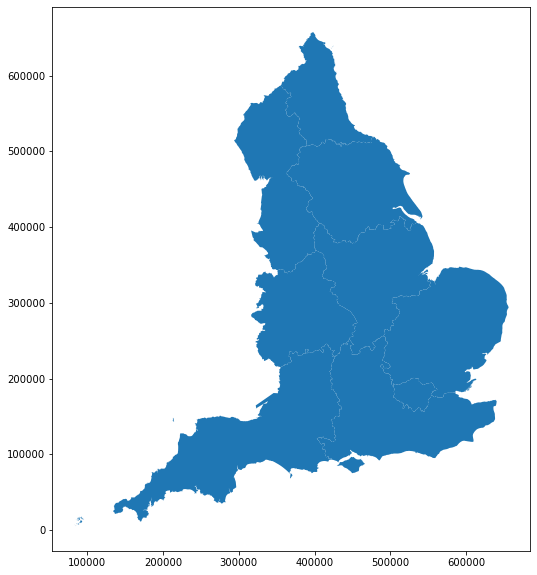

In [45]:
fp4='infuse_rgn_2011.shp'
map_df4=geopandas.read_file(fp4)
map_df4.plot(figsize=(20,10))

In [48]:
df_web = pd.read_html('https://www.robertsharp.co.uk/2017/08/09/a-table-that-shows-the-uk-region-for-all-postcode-districts/')[0]

In [49]:
df_web=df_web.drop(['Postcode district'],axis=1)

In [51]:
df_web['UK region']=df_web['UK region'].replace({'East of England' : 'East England' })

In [52]:
merged3 = result_only_num.set_index('Address').join(df_web.set_index('Postcode prefix'), on='Address', how='left', lsuffix='_left', rsuffix='_right')

In [53]:
merged3=merged3.reset_index()

In [54]:
merged3=merged3.dropna()

In [55]:
merged3['UK region'].value_counts()

Greater London      2645
South East          1249
North West           999
West Midlands        841
East England         768
North East           613
East Midlands        606
South West           606
Scotland             454
Wales                208
Northern Ireland      21
Name: UK region, dtype: int64

In [56]:
merged3_uk=pd.DataFrame(merged3.groupby(['UK region']).mean())

In [57]:
merged3_uk=merged3_uk.reset_index()

In [58]:
merged3_uk

,UK region,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
0,East England,14.016797,11.293099,16.055729,-1.565495,38.288542,36.643359,46.213542,53.786458,49.979427,50.020573,54.217318,45.782682,60.973047,39.026953
1,East Midlands,14.900165,11.216172,8.070297,-9.868317,38.242904,36.041419,50.768977,49.231023,54.768977,45.231023,58.595215,41.404785,64.367822,35.632178
2,Greater London,16.593724,13.363781,23.578261,1.617618,48.167183,46.734216,46.747524,53.252476,51.072439,48.927561,55.935161,44.064839,62.755463,37.244537
3,North East,13.705057,11.459543,20.161011,-3.676020,35.982871,34.926917,51.388254,48.611746,56.157912,43.842088,60.499511,39.500489,64.992985,35.007015
4,North West,13.342442,9.439039,21.934735,-3.331832,40.300901,37.996296,50.196196,49.803804,54.761261,45.238739,57.558759,42.441241,63.338539,36.661461
5,Northern Ireland,9.742857,9.976190,33.776190,19.814286,42.195238,37.990476,62.233333,37.766667,71.038095,28.961905,74.119048,25.880952,77.728571,22.271429
6,Scotland,13.520485,10.787225,22.281718,-4.734141,43.074449,42.732819,54.299559,45.700441,59.463877,40.536123,63.537445,36.462555,68.414978,31.585022
7,South East,15.083267,12.460288,22.059167,12.005124,44.282466,42.422578,48.193915,51.806085,52.953723,47.046277,57.699039,42.300961,63.465012,36.534988
8,South West,14.714686,12.608581,-4.561716,-25.065347,39.146205,37.722442,46.861386,53.138614,49.944719,50.055281,55.099835,44.900165,61.712046,38.287954
9,Wales,10.777885,7.822115,1.582692,5.277885,40.705769,37.456731,51.507692,48.492308,56.336538,43.663462,60.452404,39.547596,64.645192,35.354808


In [60]:
merged3_uk=merged3_uk.drop([5,6,9])

In [61]:
map_df4['geo_label'][0] = 'East England'
map_df4['geo_label'][4] = 'Greater London'


<ipython-input-61-dc30b5a51ae3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_df4['geo_label'][0] = 'East England'
<ipython-input-61-dc30b5a51ae3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_df4['geo_label'][4] = 'Greater London'


In [62]:
merged_final=map_df4.set_index('geo_label').join(merged3_uk.set_index('UK region'), on='geo_label', how='left', lsuffix='_left', rsuffix='_right')

In [63]:
merged_final.iloc[1]['DiffMeanHourlyPercent']=13.6
merged_final.iloc[1]['DiffMedianHourlyPercent']=10.7
merged_final.iloc[1]['DiffMeanBonusPercent']=21
merged_final.iloc[1]['DiffMedianBonusPercent']=-3.5


<ipython-input-63-6e30f89ce669>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_final.iloc[1]['DiffMeanHourlyPercent']=13.6
<ipython-input-63-6e30f89ce669>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_final.iloc[1]['DiffMedianHourlyPercent']=10.7
<ipython-input-63-6e30f89ce669>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_final.iloc[1]['DiffMeanBonusPercent']=21
<ipython-input-63-6e30f89ce669>:4: SettingWi

In [64]:
merged_final

,geo_code,label,name,geometry,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
geo_label,,,,,,,,,,,,,,,,,,
East England,E12000006,E12000006,East of England,"POLYGON ((617106.688 343482.308, 617111.010 34...",14.016797,11.293099,16.055729,-1.565495,38.288542,36.643359,46.213542,53.786458,49.979427,50.020573,54.217318,45.782682,60.973047,39.026953
Yorkshire and The Humber,E12000003,E12000003,Yorkshire and The Humber,"POLYGON ((510758.595 482644.305, 510766.754 48...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South East,E12000008,E12000008,South East,"MULTIPOLYGON (((508236.589 171797.716, 508240....",15.083267,12.460288,22.059167,12.005124,44.282466,42.422578,48.193915,51.806085,52.953723,47.046277,57.699039,42.300961,63.465012,36.534988
East Midlands,E12000004,E12000004,East Midlands,"POLYGON ((454996.828 276726.552, 454974.133 27...",14.900165,11.216172,8.070297,-9.868317,38.242904,36.041419,50.768977,49.231023,54.768977,45.231023,58.595215,41.404785,64.367822,35.632178
Greater London,E12000007,E12000007,London,"POLYGON ((534527.083 200056.467, 534528.375 20...",16.593724,13.363781,23.578261,1.617618,48.167183,46.734216,46.747524,53.252476,51.072439,48.927561,55.935161,44.064839,62.755463,37.244537
South West,E12000009,E12000009,South West,"MULTIPOLYGON (((409873.806 239325.091, 409867....",14.714686,12.608581,-4.561716,-25.065347,39.146205,37.722442,46.861386,53.138614,49.944719,50.055281,55.099835,44.900165,61.712046,38.287954
West Midlands,E12000005,E12000005,West Midlands,"POLYGON ((431443.073 299111.230, 431449.304 29...",13.812842,10.876219,18.678002,-1.090012,39.510226,38.226635,51.751249,48.248751,56.200595,43.799405,60.089536,39.910464,65.056837,34.943163
North West,E12000002,E12000002,North West,"POLYGON ((380424.183 522381.432, 380424.209 52...",13.342442,9.439039,21.934735,-3.331832,40.300901,37.996296,50.196196,49.803804,54.761261,45.238739,57.558759,42.441241,63.338539,36.661461
North East,E12000001,E12000001,North East,"MULTIPOLYGON (((450648.313 535677.376, 450686....",13.705057,11.459543,20.161011,-3.676020,35.982871,34.926917,51.388254,48.611746,56.157912,43.842088,60.499511,39.500489,64.992985,35.007015


In [65]:
merged_final=merged_final.fillna(10.7)

In [66]:
merged_final=merged_final.reset_index()

In [67]:
merged_final['try'] = merged_final['DiffMedianHourlyPercent'].apply(lambda x: x**6)

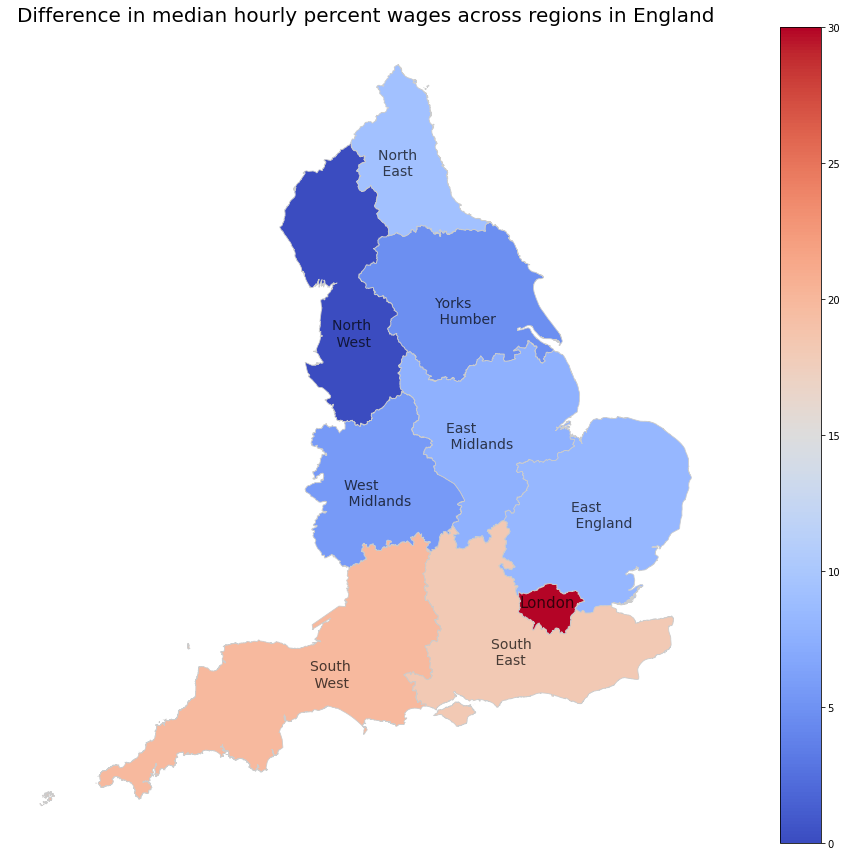

In [68]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'try'
#variable_df=gdf[variable]

#vmin, vmax =  variable_df.min(),   variable_df.max() #



# set the range for the choropleth
vmin, vmax = 0, 30
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 15))

color='black'

ax.axis('off')

ax.annotate('North \n East', xy=(380000,560000), fontsize=14, c=color, alpha=0.7)
ax.annotate('North \n West', xy=(340000,410000), fontsize=14, c=color, alpha=0.7)

ax.annotate('Yorks \n Humber', xy=(430000,430000), fontsize=14, c=color, alpha=0.7)

ax.annotate('West \n Midlands', xy=(350000,270000), fontsize=14, c=color, alpha=0.7)

ax.annotate('East \n Midlands', xy=(440000,320000), fontsize=14, c=color, alpha=0.7)
ax.annotate('East \n England', xy=(550000,250000), fontsize=14, c=color, alpha=0.7)

ax.annotate('South \n West', xy=(320000,110000), fontsize=14, c=color, alpha=0.7)

ax.annotate('South \n East', xy=(480000,130000), fontsize=14, c=color, alpha=0.7)


ax.annotate('London', xy=(505000,180000), fontsize=15, c=color, alpha=0.7)




ax.set_title('Difference in median hourly percent wages across regions in England', fontsize=20)

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged_final.plot(column=variable, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.savefig('Difference in median hourly percent wages across regions in England')

# Folium heatmap of areawise gender discrimination

In [69]:
import folium
import pandas as pd
import folium.plugins as plugins

In [70]:
data_heat = averages_uk[['latitude','longitude','DiffMedianHourlyPercent']].values.tolist()
m = folium.Map(location=(53.5,-2), zoom_start=6.5,disable_3d=True)

plugins.HeatMap(data=data_heat, radius=20).add_to(m)
m.save('cs2.html')

In [76]:
merged_final['try2'] = merged_final['DiffMeanBonusPercent'].apply(lambda x: x**6)

In [77]:
merged_final['try3'] = merged_final['MaleLowerQuartile'].apply(lambda x: x**5)

In [80]:
uk_data

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated",DT,226143,85310,19.6,32.5,NaN,NaN,0.0,0.0,...,55.1,53.3,46.7,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),500 to 999,"""Bryanston School"",Incorporated",False,05/04/2019 00:00,03/04/2019 13:43
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED",EH,SC016876,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,...,88.4,20.3,79.7,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2019 00:00,01/04/2019 12:37
2,118 LIMITED,CF,3951948,61900,7.7,12.7,11.3,10.9,67.0,52.0,...,50.0,56.0,44.0,NaN,Michael Graham (CEO),1000 to 4999,118 LIMITED,False,05/04/2019 00:00,06/03/2019 13:26
3,123 EMPLOYEES LTD,LS,10530651,78300,30.0,29.0,-10.0,69.0,46.0,74.0,...,83.0,25.0,75.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,False,05/04/2019 00:00,03/04/2019 15:43
4,1509 GROUP,GU,4104101,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,...,51.6,61.3,38.7,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),250 to 499,1509 GROUP,False,05/04/2019 00:00,18/03/2019 14:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,ZPG LIMITED,SE,9005884,63120,24.0,29.0,46.0,29.0,61.0,39.0,...,34.0,78.0,22.0,NaN,Emma Baker (HR Operations Manager),500 to 999,ZPG LIMITED,False,05/04/2019 00:00,03/04/2019 14:15
10809,ZURICH EMPLOYMENT SERVICES LIMITED,GL,243883,"78300,\r\n82990",26.6,29.6,56.9,53.2,95.0,94.0,...,45.6,70.9,29.1,https://www.zurich.co.uk/_/media/dbe/united-ki...,Steve Collinson (Head of UK HR),1000 to 4999,ZURICH EMPLOYMENT SERVICES LIMITED,False,05/04/2019 00:00,04/03/2019 09:29
10810,ZURICH UK GENERAL SERVICES LIMITED,PO,3843124,82990,22.3,23.8,51.6,50.6,95.0,96.0,...,29.0,70.2,29.8,https://www.zurich.co.uk/_/media/dbe/united-ki...,Steve Collinson (Head of UK HR),1000 to 4999,ZURICH UK GENERAL SERVICES LIMITED,False,05/04/2019 00:00,04/03/2019 09:37
10811,ZUTO HOLDINGS LIMITED,SK,8563366,70100,25.0,21.0,48.0,56.0,58.0,84.0,...,28.0,80.0,20.0,https://www.zuto.com/gender-pay-report/,James Wilkinson (CEO),250 to 499,ZUTO HOLDINGS LIMITED,False,05/04/2019 00:00,21/03/2019 10:38


In [81]:
uk_industry=uk_data.drop(['EmployerName', 'CompanyNumber', 'CompanyLinkToGPGInfo', 'ResponsiblePerson', 'CurrentName', 'SubmittedAfterTheDeadline', 'DueDate' , 'DateSubmitted', 'EmployerSize'],axis=1)

In [82]:
uk_industry

,Address,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
0,DT,85310,19.6,32.5,NaN,NaN,0.0,0.0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7
1,EH,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7
2,CF,61900,7.7,12.7,11.3,10.9,67.0,52.0,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0
3,LS,78300,30.0,29.0,-10.0,69.0,46.0,74.0,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0
4,GU,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,SE,63120,24.0,29.0,46.0,29.0,61.0,39.0,52.0,48.0,54.0,46.0,66.0,34.0,78.0,22.0
10809,GL,"78300,\r\n82990",26.6,29.6,56.9,53.2,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1
10810,PO,82990,22.3,23.8,51.6,50.6,95.0,96.0,37.9,62.1,61.8,38.2,71.0,29.0,70.2,29.8
10811,SK,70100,25.0,21.0,48.0,56.0,58.0,84.0,41.0,59.0,62.0,38.0,72.0,28.0,80.0,20.0


In [83]:
uk_industry['SicCodes'].value_counts()

82990                                  450
1,\r\n84110                            355
70100                                  249
1,\r\n85310                            233
1,\r\n86210                            221
                                      ... 
85510,\r\n93199                          1
26110,\r\n26512,\r\n27110,\r\n27120      1
26511,\r\n27900,\r\n32500,\r\n46900      1
47710,\r\n47721,\r\n70100                1
85310,\r\n87300                          1
Name: SicCodes, Length: 1982, dtype: int64

In [84]:
uk_industry['SicCodes']=uk_industry['SicCodes'].str[-5:]
uk_industry['SicCodes']=uk_industry['SicCodes'].replace('\n','', regex=True)
uk_industry['SicCodes']=uk_industry['SicCodes'].replace('\r','', regex=True)
uk_industry['SicCodes']=uk_industry['SicCodes'].replace(',','', regex=True)
uk_industry['SicCodes']=uk_industry['SicCodes'].replace(' ','', regex=True)
uk_industry['industry']=uk_industry['SicCodes']

In [85]:
uk_industry['SicCodes']=uk_industry['SicCodes'].str[-5:]

In [86]:
uk_industry['SicCodes']=uk_industry['SicCodes'].replace('\n','', regex=True)
uk_industry['SicCodes']=uk_industry['SicCodes'].replace('\r','', regex=True)
uk_industry['SicCodes']=uk_industry['SicCodes'].replace(',','', regex=True)
uk_industry['SicCodes']=uk_industry['SicCodes'].replace(' ','', regex=True)

In [87]:
uk_industry['industry']=uk_industry['SicCodes']

In [88]:
uk_industry.dtypes

Address                       object
SicCodes                      object
DiffMeanHourlyPercent        float64
DiffMedianHourlyPercent      float64
DiffMeanBonusPercent         float64
DiffMedianBonusPercent       float64
MaleBonusPercent             float64
FemaleBonusPercent           float64
MaleLowerQuartile            float64
FemaleLowerQuartile          float64
MaleLowerMiddleQuartile      float64
FemaleLowerMiddleQuartile    float64
MaleUpperMiddleQuartile      float64
FemaleUpperMiddleQuartile    float64
MaleTopQuartile              float64
FemaleTopQuartile            float64
industry                      object
dtype: object

In [89]:
uk_industry=uk_industry.dropna(subset=['industry'])

In [90]:
uk_industry["industry"] = uk_industry["industry"].astype(str).astype(int)

<ipython-input-90-6c47aed08874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_industry["industry"] = uk_industry["industry"].astype(str).astype(int)


In [92]:
uk_industry['in_name']=1

<ipython-input-92-4fa548277027>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_industry['in_name']=1


In [93]:
uk_industry.loc[(uk_industry['industry'] > 10109) & (uk_industry['industry'] < 33201) , 'in_name'] = 'Manufacturing'
uk_industry.loc[(uk_industry['industry'] > 35109) & (uk_industry['industry'] < 35301) , 'in_name'] = 'Electricity, gas, steam and air conditioning supply'
uk_industry.loc[(uk_industry['industry'] > 35999) & (uk_industry['industry'] < 39001) , 'in_name'] = 'Water supply, sewerage, waste management and remediation activities'
uk_industry.loc[(uk_industry['industry'] > 41099) & (uk_industry['industry'] < 53203) , 'in_name'] = 'Construction'
uk_industry.loc[(uk_industry['industry'] > 45109) & (uk_industry['industry'] < 47991) , 'in_name'] = 'Wholesale and retail trade; repair of motor vehicles and motorcycles'
uk_industry.loc[(uk_industry['industry'] > 49099) & (uk_industry['industry'] < 53203) , 'in_name'] = 'Transportation and storage'
uk_industry.loc[(uk_industry['industry'] > 55109) & (uk_industry['industry'] < 56303) , 'in_name'] = 'Accommodation and food service activities'
uk_industry.loc[(uk_industry['industry'] > 58109) & (uk_industry['industry'] < 63991) , 'in_name'] = 'Information and communication'
uk_industry.loc[(uk_industry['industry'] > 64109) & (uk_industry['industry'] < 66301) , 'in_name'] = 'Financial and insurance activities'
uk_industry.loc[(uk_industry['industry'] > 68099) & (uk_industry['industry'] < 68321) , 'in_name'] = 'Real estate activities'
uk_industry.loc[(uk_industry['industry'] > 69100) & (uk_industry['industry'] < 75001) , 'in_name'] = 'Professional, scientific and technical activities'
uk_industry.loc[(uk_industry['industry'] > 77109) & (uk_industry['industry'] < 82989) , 'in_name'] = 'Administrative and support service activities'
uk_industry.loc[(uk_industry['industry'] > 84109) & (uk_industry['industry'] < 84301) , 'in_name'] = 'Public administration and defence; compulsory social security'
uk_industry.loc[(uk_industry['industry'] > 85099) & (uk_industry['industry'] < 85601) , 'in_name'] = 'Education'
uk_industry.loc[(uk_industry['industry'] > 86100) & (uk_industry['industry'] < 88991) , 'in_name'] = 'Human health and social work activities'
uk_industry.loc[(uk_industry['industry'] > 90009) & (uk_industry['industry'] < 93291) , 'in_name'] = 'Arts, entertainment and recreation'
uk_industry.loc[(uk_industry['industry'] > 94109) & (uk_industry['industry'] < 96091) , 'in_name'] = 'Other service activities'
uk_industry.loc[(uk_industry['industry'] > 96999) & (uk_industry['industry'] < 98201) , 'in_name'] = 'Activities of households as employers; undifferentiated ' #goods and services producing activities of households for own use
#uk_industry.loc[(uk_industry['industry'] > 89) & (uk_industry['industry'] < 33201) , 'in_name'] = 'Activities of extraterritorial organisations and bodies'

C:\Users\ibulf\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [94]:
uk_industry['in_name'].value_counts()

Manufacturing                                                           1227
Education                                                               1207
Human health and social work activities                                 1036
Wholesale and retail trade; repair of motor vehicles and motorcycles    1015
1                                                                        927
Administrative and support service activities                            822
Professional, scientific and technical activities                        765
Public administration and defence; compulsory social security            488
Accommodation and food service activities                                434
Information and communication                                            430
Financial and insurance activities                                       399
Transportation and storage                                               395
Arts, entertainment and recreation                                       328

In [95]:
uk_industry = uk_industry[uk_industry.in_name != 1]

In [96]:
uk_industry

,Address,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,industry,in_name
0,DT,85310,19.6,32.5,NaN,NaN,0.0,0.0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7,85310,Education
1,EH,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7,47730,Wholesale and retail trade; repair of motor ve...
2,CF,61900,7.7,12.7,11.3,10.9,67.0,52.0,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0,61900,Information and communication
3,LS,78300,30.0,29.0,-10.0,69.0,46.0,74.0,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0,78300,Administrative and support service activities
4,GU,85310,13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,85310,Education
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,EC,10890,11.0,0.0,73.0,92.0,12.0,19.0,33.0,67.0,32.0,68.0,65.0,35.0,68.0,32.0,10890,Manufacturing
10807,CR,70100,14.8,10.2,45.4,11.3,80.0,82.6,76.0,24.0,86.0,14.0,86.0,14.0,87.0,13.0,70100,"Professional, scientific and technical activities"
10808,SE,63120,24.0,29.0,46.0,29.0,61.0,39.0,52.0,48.0,54.0,46.0,66.0,34.0,78.0,22.0,63120,Information and communication
10811,SK,70100,25.0,21.0,48.0,56.0,58.0,84.0,41.0,59.0,62.0,38.0,72.0,28.0,80.0,20.0,70100,"Professional, scientific and technical activities"


In [97]:
uk_industry_draft=pd.DataFrame(uk_industry.groupby(['in_name']).mean())

In [98]:
uk_industry_draft=uk_industry_draft.drop(['industry'], axis=1)

In [99]:
uk_industry_draft

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
in_name,,,,,,,,,,,,,,
Accommodation and food service activities,6.963134,3.415438,16.833167,7.496509,20.922350,19.603226,46.159447,53.840553,48.146083,51.853917,49.689862,50.310138,55.826267,44.173733
Activities of households as employers; undifferentiated,7.642857,4.285714,11.060000,16.620000,14.900000,10.228571,44.842857,55.157143,46.985714,53.014286,46.857143,53.142857,53.157143,46.842857
Administrative and support service activities,7.887348,5.876642,-11.912199,-56.360937,25.909246,26.661436,51.553041,48.446959,54.111557,45.888443,57.453406,42.546594,61.569708,38.430292
"Arts, entertainment and recreation",19.654573,5.176220,26.734211,5.290226,24.340244,20.851829,48.938415,51.061585,50.560061,49.439939,53.183841,46.816159,59.884756,40.115244
Construction,22.223776,23.133916,25.100733,-9.585348,45.688112,46.517832,69.058042,30.941958,81.556294,18.443706,87.937413,12.062587,90.058392,9.941608
Education,16.335377,22.363546,5.016119,-1.241580,5.217233,5.519056,22.616156,77.383844,26.339934,73.660066,31.932063,68.067937,39.086413,60.913587
"Electricity, gas, steam and air conditioning supply",13.961538,13.376923,27.916000,15.548000,64.992308,63.611538,64.453846,35.546154,72.982692,27.017308,77.434615,22.565385,81.769231,18.230769
Financial and insurance activities,26.118045,21.919298,45.419380,31.769430,66.496742,64.960150,42.951629,57.048371,49.893734,50.106266,58.542356,41.457644,69.729825,30.270175
Human health and social work activities,10.560714,5.042568,-2.767283,-1.373115,11.476737,11.116602,22.522201,77.477799,21.877413,78.122587,22.406853,77.593147,28.018147,71.981853


In [100]:
write=pd.DataFrame(uk_industry['in_name'])

In [101]:
write.to_excel("write_try.xlsx")  

In [102]:
uk_industry_draft=uk_industry_draft.reset_index()

# Mean hourly percent diff by sector

<BarContainer object of 18 artists>

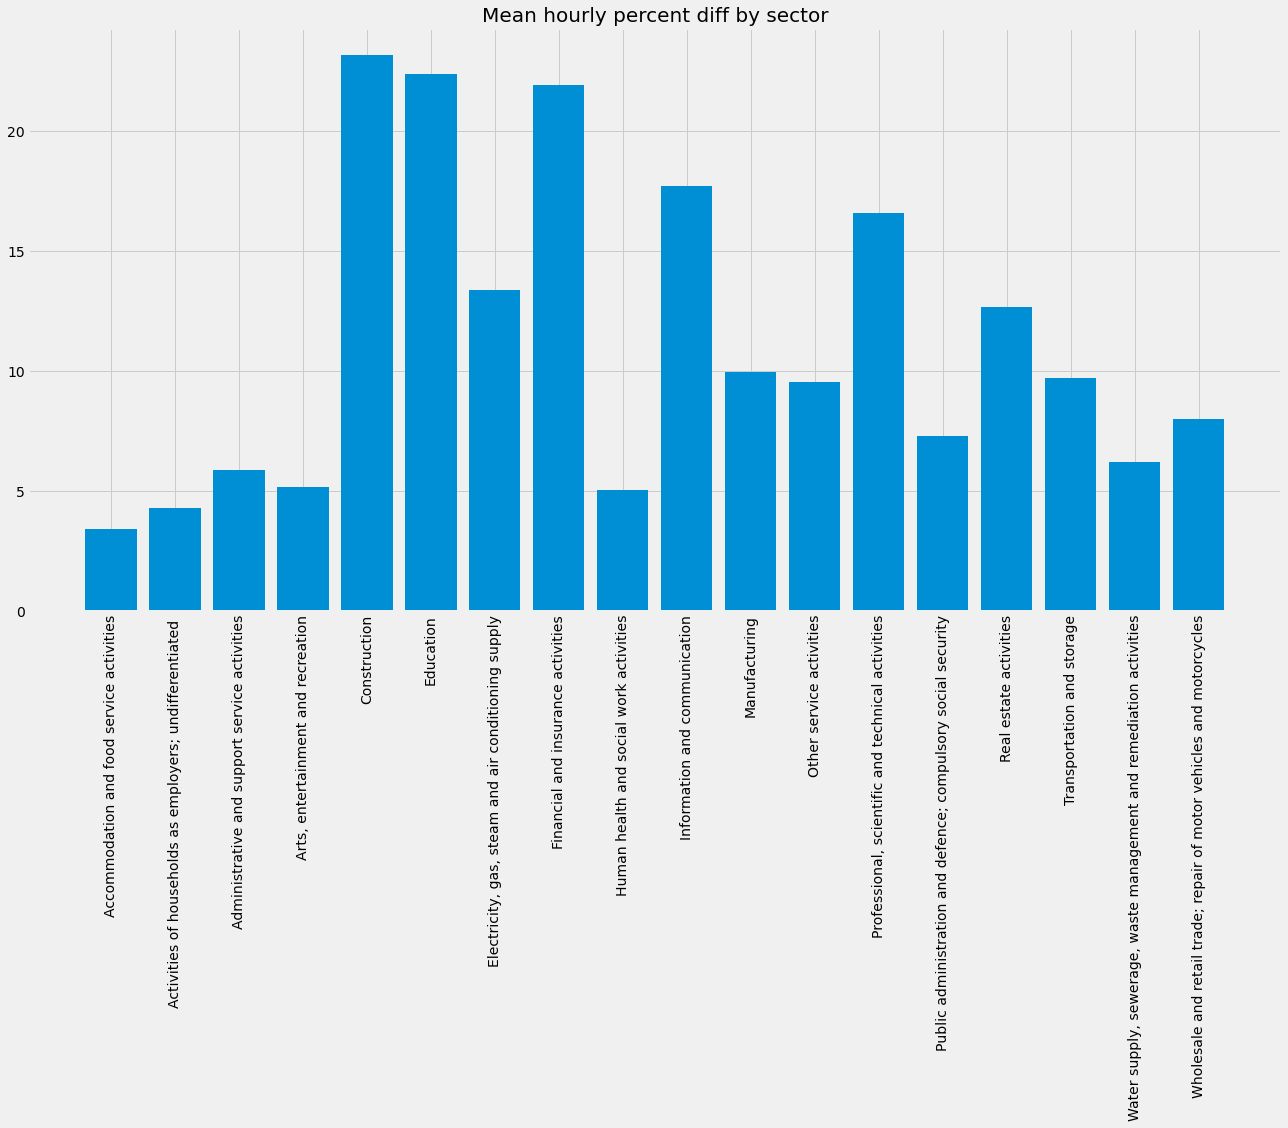

In [103]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.title('Mean hourly percent diff by sector', fontsize=20)
plt.xticks(rotation=90)
ax.bar(uk_industry_draft['in_name'], uk_industry_draft['DiffMedianHourlyPercent'] )

In [105]:
result_only_num=result_only_num.drop(['Address'],axis=1)

In [106]:
result_only_num.mean()

DiffMeanHourlyPercent        14.177413
DiffMedianHourlyPercent      11.876817
DiffMeanBonusPercent         18.373350
DiffMedianBonusPercent       -1.147343
MaleBonusPercent             35.735570
FemaleBonusPercent           34.422131
MaleLowerQuartile            46.112890
FemaleLowerQuartile          53.887110
MaleLowerMiddleQuartile      50.181508
FemaleLowerMiddleQuartile    49.818492
MaleUpperMiddleQuartile      54.388739
FemaleUpperMiddleQuartile    45.611261
MaleTopQuartile              60.252369
FemaleTopQuartile            39.747631
dtype: float64

In [107]:
female_q=pd.DataFrame(result_only_num.mean())

In [109]:
female_q=female_q.T

In [110]:
female_q

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
0,14.177413,11.876817,18.37335,-1.147343,35.73557,34.422131,46.11289,53.88711,50.181508,49.818492,54.388739,45.611261,60.252369,39.747631


In [133]:
uk_size=result.drop(['Address', 'SicCodes'],axis=1)

In [134]:
uk_size=uk_size.dropna()

In [135]:
uk_size

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,EmployerSize
1,7.7,-4.2,23.7,-75.2,22.2,82.0,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7,250 to 499
2,7.7,12.7,11.3,10.9,67.0,52.0,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0,1000 to 4999
3,30.0,29.0,-10.0,69.0,46.0,74.0,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0,250 to 499
4,13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,250 to 499
5,-25.0,-36.0,-69.0,17.0,25.0,75.0,49.0,51.0,63.0,37.0,32.0,68.0,23.0,77.0,250 to 499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,24.0,29.0,46.0,29.0,61.0,39.0,52.0,48.0,54.0,46.0,66.0,34.0,78.0,22.0,500 to 999
10809,26.6,29.6,56.9,53.2,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1,1000 to 4999
10810,22.3,23.8,51.6,50.6,95.0,96.0,37.9,62.1,61.8,38.2,71.0,29.0,70.2,29.8,1000 to 4999
10811,25.0,21.0,48.0,56.0,58.0,84.0,41.0,59.0,62.0,38.0,72.0,28.0,80.0,20.0,250 to 499


In [136]:
uk_size_draft=pd.DataFrame(uk_size.groupby(['EmployerSize']).mean())


In [137]:
uk_size_draft=uk_size_draft.reset_index()

In [138]:
uk_size_draft

,EmployerSize,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
0,1000 to 4999,14.513690,11.273553,22.921492,-3.068793,40.456379,38.873307,46.474289,53.525711,50.524289,49.475711,54.482434,45.517566,60.744652,39.255348
1,"20,000 or more",13.842623,9.134426,34.044262,21.645902,50.598361,51.380328,43.849180,56.150820,45.796721,54.203279,51.111475,48.888525,61.062295,38.937705
2,250 to 499,14.966777,12.126578,11.306874,-7.901808,43.027062,41.706670,50.372098,49.627902,54.912500,45.087500,59.291344,40.708656,65.156059,34.843941
3,500 to 999,14.693826,12.004251,23.023848,7.928367,44.394541,42.167919,50.172260,49.827740,54.707740,45.292260,59.247651,40.752349,64.613647,35.386353
4,"5000 to 19,999",15.326580,10.464488,30.263399,18.047277,35.350109,33.040959,41.067538,58.932462,43.366667,56.633333,47.879956,52.120044,56.018301,43.981699
5,Less than 250,15.073929,12.592857,23.721429,-1.775357,46.932857,46.545357,48.780357,51.219643,55.524643,44.475357,59.695000,40.305000,65.468929,34.531071
6,Not Provided,7.044444,3.500000,34.688889,25.833333,37.077778,35.755556,49.466667,50.533333,54.055556,45.944444,54.733333,45.266667,60.522222,39.477778


In [139]:
uk_size_draft=uk_size_draft.drop([6])

In [140]:
uk_size_draft['sorting']=[4,6,2,3,5,1]

In [141]:
uk_size_draft=uk_size_draft.sort_values(by=['sorting'])

In [142]:
uk_size_draft

,EmployerSize,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,sorting
5,Less than 250,15.073929,12.592857,23.721429,-1.775357,46.932857,46.545357,48.780357,51.219643,55.524643,44.475357,59.695000,40.305000,65.468929,34.531071,1
2,250 to 499,14.966777,12.126578,11.306874,-7.901808,43.027062,41.706670,50.372098,49.627902,54.912500,45.087500,59.291344,40.708656,65.156059,34.843941,2
3,500 to 999,14.693826,12.004251,23.023848,7.928367,44.394541,42.167919,50.172260,49.827740,54.707740,45.292260,59.247651,40.752349,64.613647,35.386353,3
0,1000 to 4999,14.513690,11.273553,22.921492,-3.068793,40.456379,38.873307,46.474289,53.525711,50.524289,49.475711,54.482434,45.517566,60.744652,39.255348,4
4,"5000 to 19,999",15.326580,10.464488,30.263399,18.047277,35.350109,33.040959,41.067538,58.932462,43.366667,56.633333,47.879956,52.120044,56.018301,43.981699,5
1,"20,000 or more",13.842623,9.134426,34.044262,21.645902,50.598361,51.380328,43.849180,56.150820,45.796721,54.203279,51.111475,48.888525,61.062295,38.937705,6


# Median Hourly Wage and Bonus Gender Gap for Different Company Sizes

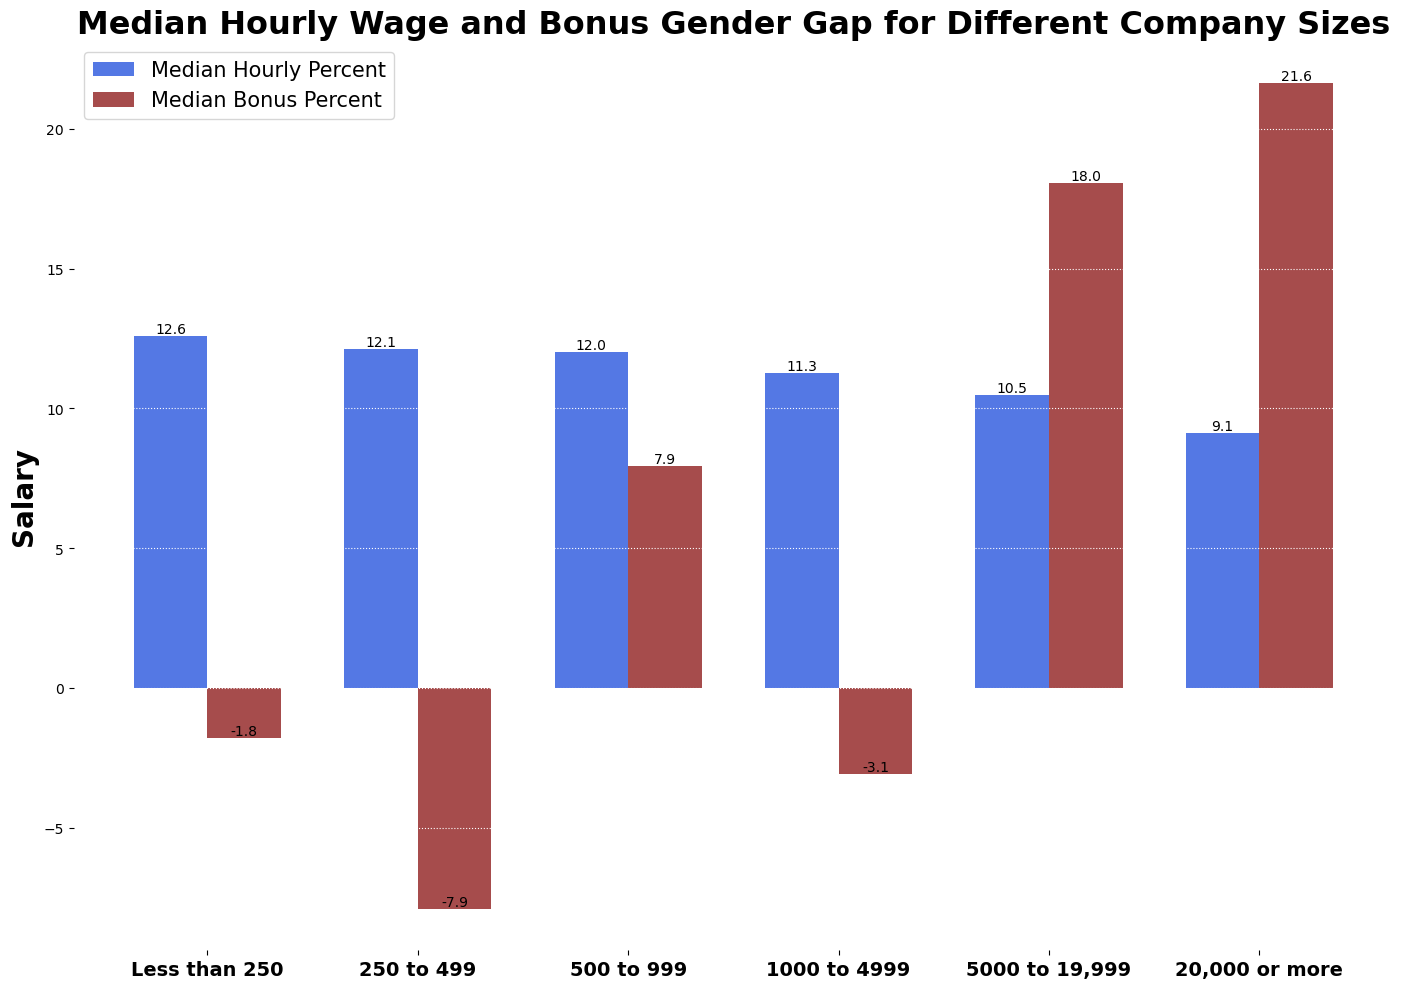

In [144]:
plt.style.use('default')
labels = uk_size_draft['EmployerSize']
men_means = uk_size_draft['DiffMedianHourlyPercent']
women_means =uk_size_draft['DiffMedianBonusPercent']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1, figsize=(15, 10))
rects1 = ax.bar(x - width/2, men_means, width, label='Median Hourly Percent', color='royalblue', alpha=0.9)
rects2 = ax.bar(x + width/2, women_means, width, label='Median Bonus Percent', color='maroon', alpha=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Salary', fontsize='20', weight='bold')
ax.set_title('Median Hourly Wage and Bonus Gender Gap for Different Company Sizes', fontsize='23', weight='bold')
ax.set_xticks(x)
plt.xticks(rotation=0)
ax.set_xticklabels(labels, weight='bold', fontsize=14)
ax.legend(fontsize=15)



def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                "{:.1f}".format(float(height)),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)


# hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


ax.grid(True, axis='y', ls=':', color='white')


fig.tight_layout()

plt.show()

In [147]:
reg_ind=result.drop(['EmployerSize' ], axis=1)

In [148]:
reg_ind

,Address,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
0,DT,85310,19.6,32.5,NaN,NaN,0.0,0.0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7
1,EH,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7
2,CF,61900,7.7,12.7,11.3,10.9,67.0,52.0,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0
3,LS,78300,30.0,29.0,-10.0,69.0,46.0,74.0,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0
4,GU,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10808,SE,63120,24.0,29.0,46.0,29.0,61.0,39.0,52.0,48.0,54.0,46.0,66.0,34.0,78.0,22.0
10809,GL,"78300,\r\n82990",26.6,29.6,56.9,53.2,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1
10810,PO,82990,22.3,23.8,51.6,50.6,95.0,96.0,37.9,62.1,61.8,38.2,71.0,29.0,70.2,29.8
10811,SK,70100,25.0,21.0,48.0,56.0,58.0,84.0,41.0,59.0,62.0,38.0,72.0,28.0,80.0,20.0


In [149]:
reg_ind2=reg_ind.set_index('Address').join(df_web.set_index('Postcode prefix'), on='Address', how='left', lsuffix='_left', rsuffix='_right')

In [150]:
reg_ind2

,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,UK region
Address,,,,,,,,,,,,,,,,
DT,85310,19.6,32.5,NaN,NaN,0.0,0.0,32.4,67.6,38.2,61.8,44.9,55.1,53.3,46.7,South West
EH,47730,7.7,-4.2,23.7,-75.2,22.2,82.0,31.6,68.4,12.7,87.3,11.6,88.4,20.3,79.7,Scotland
CF,61900,7.7,12.7,11.3,10.9,67.0,52.0,41.0,59.0,45.0,55.0,50.0,50.0,56.0,44.0,Wales
LS,78300,30.0,29.0,-10.0,69.0,46.0,74.0,0.0,100.0,2.0,98.0,17.0,83.0,25.0,75.0,North East
GU,"85200,\r\n85310",13.4,12.7,0.0,0.0,0.0,0.0,38.1,61.9,43.6,56.4,48.4,51.6,61.3,38.7,South East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SE,63120,24.0,29.0,46.0,29.0,61.0,39.0,52.0,48.0,54.0,46.0,66.0,34.0,78.0,22.0,Greater London
GL,"78300,\r\n82990",26.6,29.6,56.9,53.2,95.0,94.0,36.9,63.1,38.8,61.2,54.4,45.6,70.9,29.1,South West
PO,82990,22.3,23.8,51.6,50.6,95.0,96.0,37.9,62.1,61.8,38.2,71.0,29.0,70.2,29.8,South East


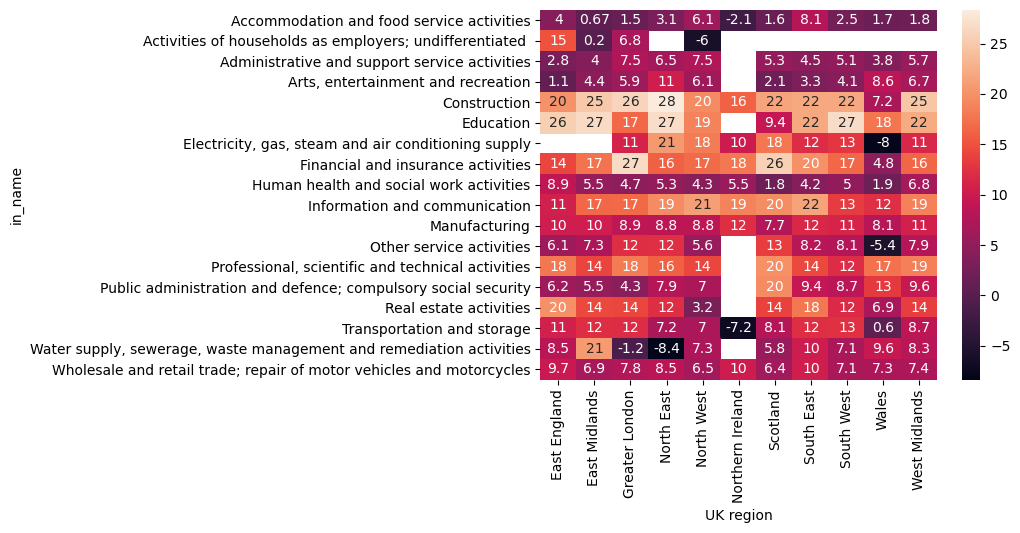

In [176]:
ax = sns.heatmap(res,annot=True)

In [181]:
df_heat['mean']=df_heat.mean(axis=1)

In [182]:
df_heat=df_heat.sort_values(by=['mean'],ascending=False)

In [186]:
df_heat

UK region,East England,East Midlands,Greater London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,mean
in_name,,,,,,,,,,,,
Construction,20.046154,25.013333,26.074324,28.338095,19.566667,16.250,21.638235,21.889655,22.005263,7.160000,24.664286,21.149638
Education,25.585507,26.757798,16.662500,27.018692,18.741463,0.000,9.400000,21.985714,26.903448,17.761111,22.228226,19.367678
Financial and insurance activities,14.200000,17.476471,26.642857,16.135714,16.994118,17.900,25.685714,19.973684,16.640000,4.833333,16.474074,17.541451
Information and communication,10.804545,16.678571,16.861435,19.473333,21.150000,18.800,19.716667,21.547500,13.406667,12.380000,18.615789,17.221319
"Professional, scientific and technical activities",17.989130,14.077778,18.301095,16.113462,14.281731,0.000,19.978947,14.369725,12.086486,17.414286,18.524074,14.830610
Real estate activities,20.000000,14.337500,14.196154,12.244444,3.165000,0.000,13.900000,17.933333,11.830000,6.950000,13.525000,11.643767
Manufacturing,10.277778,10.347857,8.945370,8.757018,8.797238,12.275,7.693827,11.635714,11.212371,8.131481,10.840314,9.901270
"Electricity, gas, steam and air conditioning supply",0.000000,0.000000,11.107143,20.620000,18.200000,10.000,18.000000,12.025000,12.890909,-8.000000,11.466667,9.664520
Public administration and defence; compulsory social security,6.203704,5.467391,4.324038,7.887500,7.015254,0.000,19.500000,9.361039,8.657778,13.176471,9.555769,8.286268


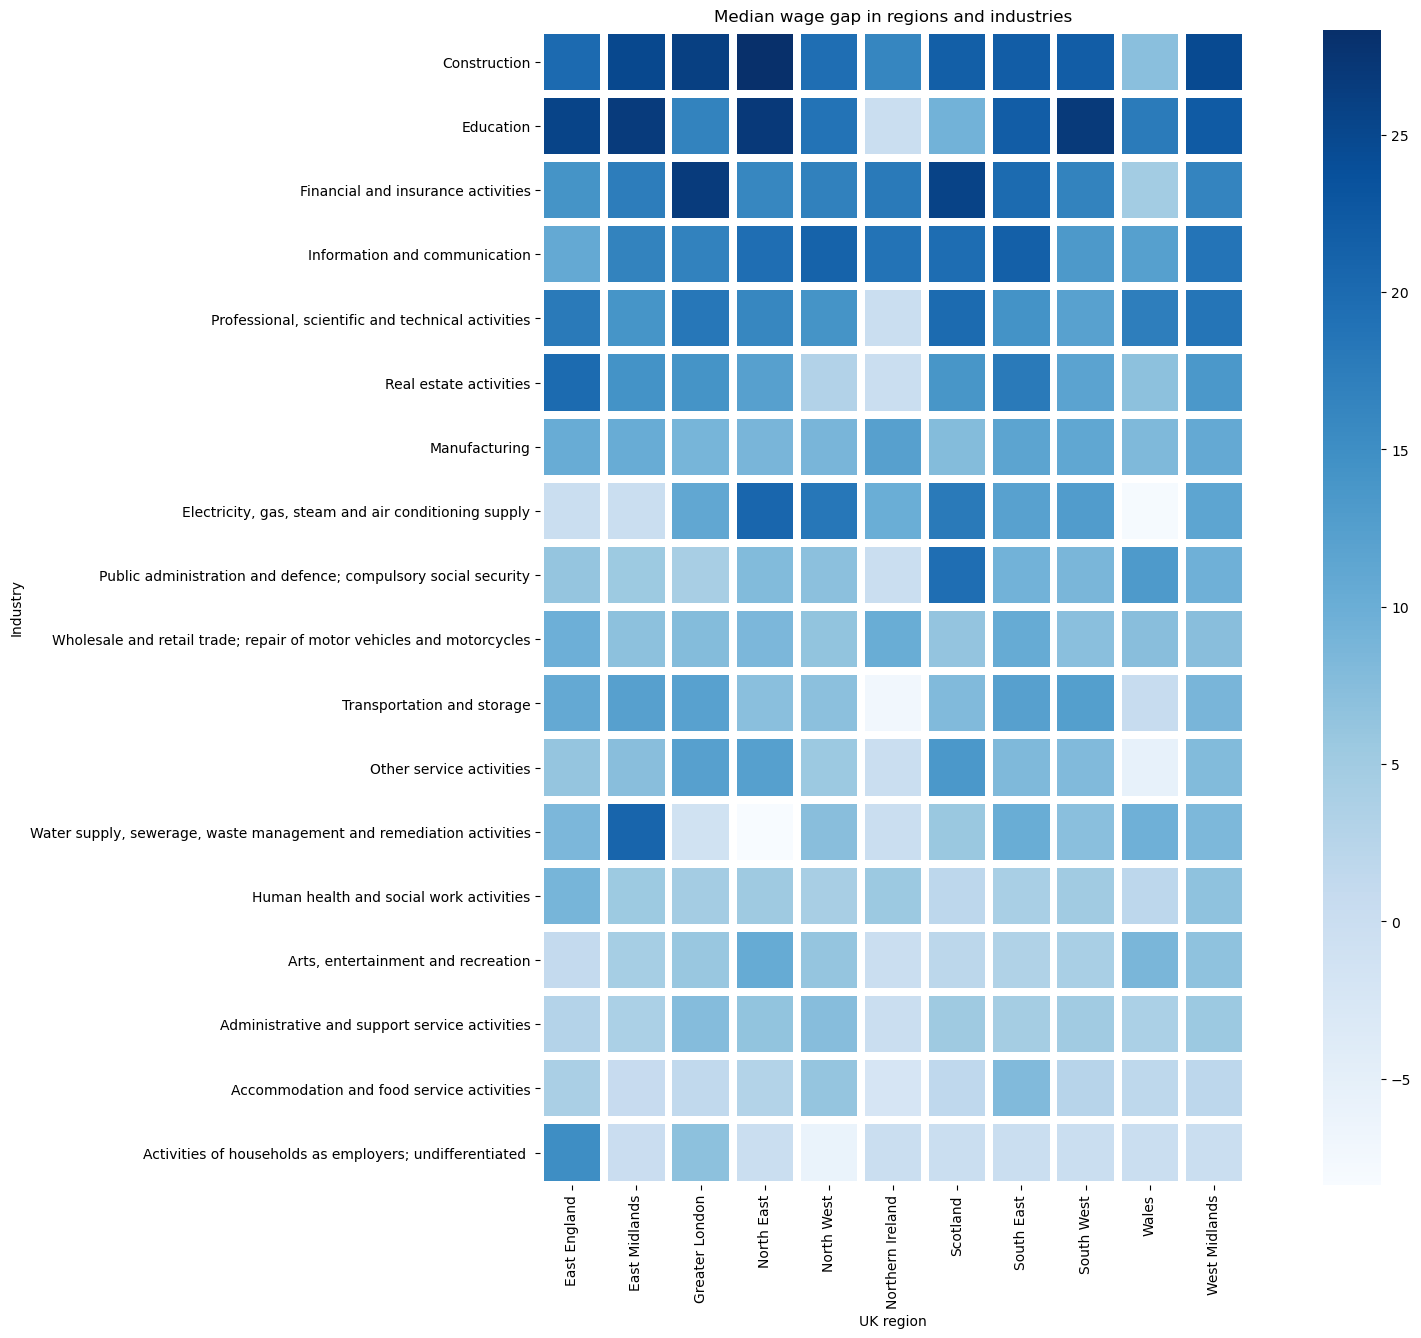

In [187]:
plt.figure(figsize=(20,15))
sns.heatmap(df_heat.drop(['mean'],axis=1), cmap='Blues',linewidths=5,square=True)
plt.ylabel('Industry')
plt.title('Median wage gap in regions and industries')
plt.savefig('heatmap_ind.jpeg')

In [192]:
df_new['mean']=df_heat['mean']

In [197]:
df_new=df_new.drop(['mean'],axis=1)

In [204]:
 df_new = df_heat.loc[:,"East England":"West Midlands"].div(3, axis=0)

# Future Plan

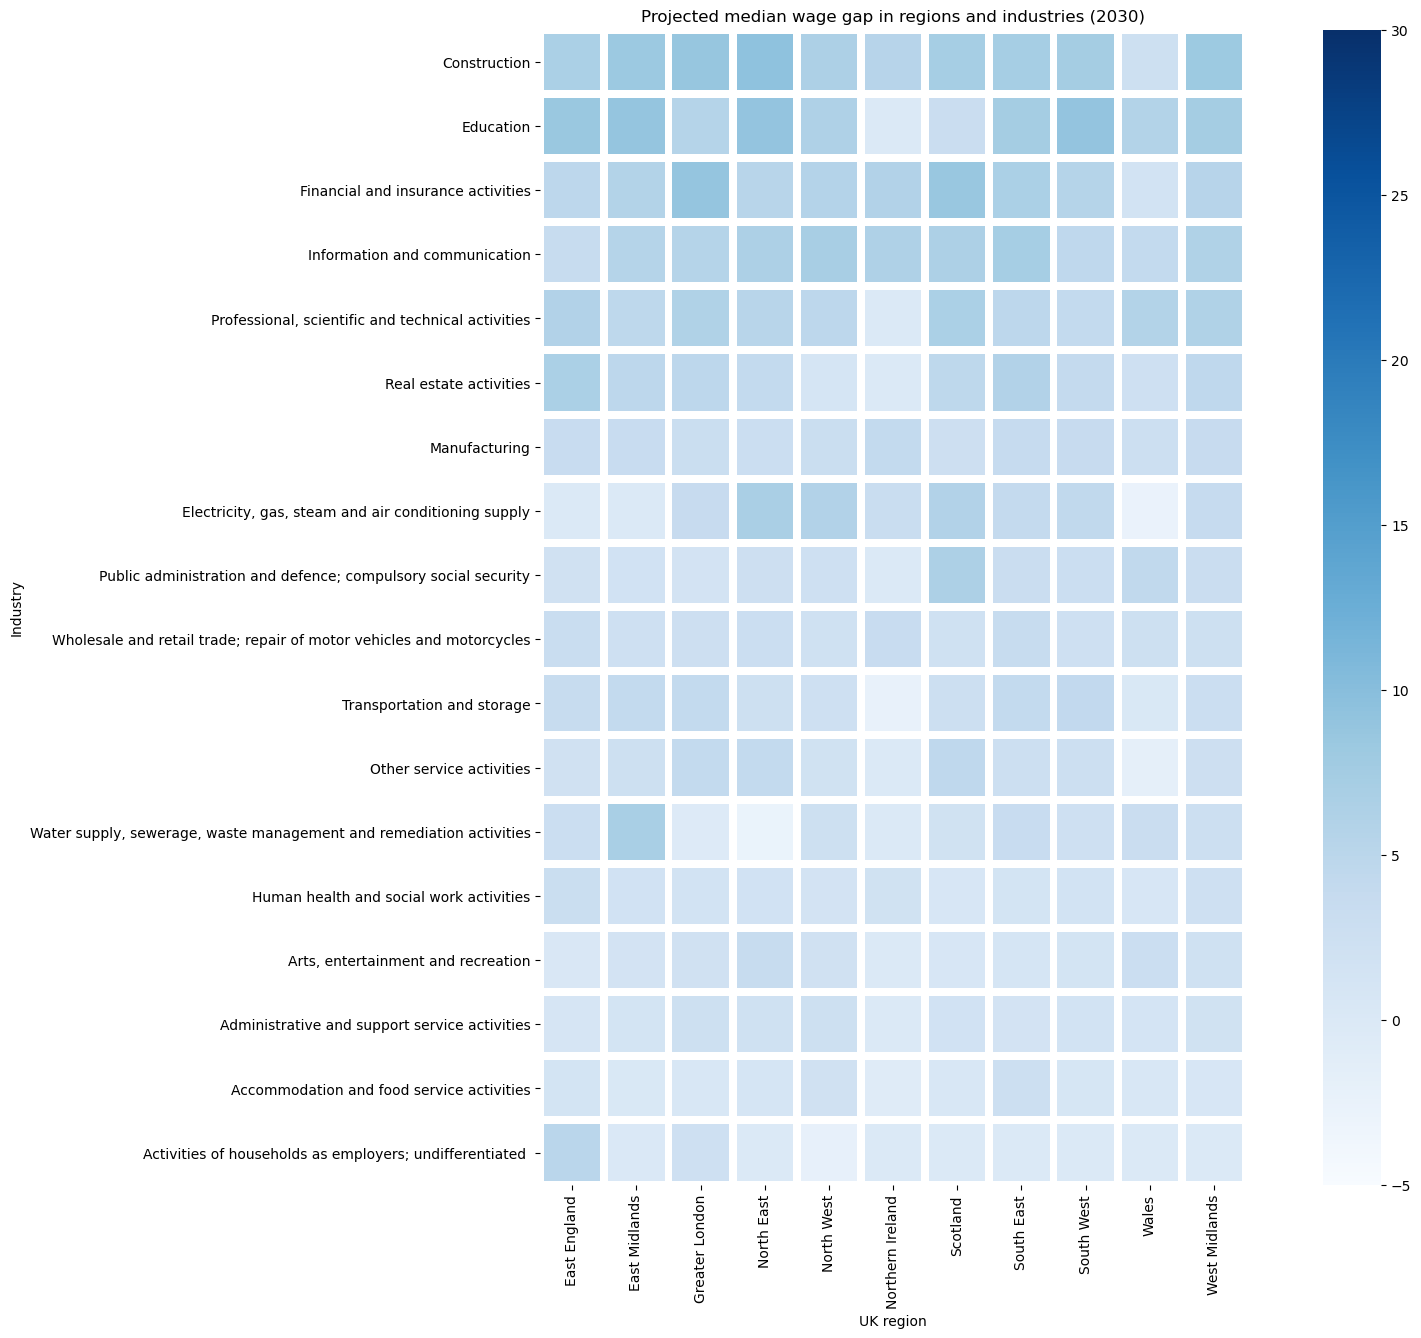

In [206]:
plt.figure(figsize=(20,15))

sns.heatmap(df_new, cmap='Blues',linewidths=5,square=True, vmin=-5,vmax=30)
plt.ylabel('Industry')
plt.title('Projected median wage gap in regions and industries (2030)')
plt.savefig('heatmap_ind.jpeg')

# Quartile wage gap between gender

<ipython-input-185-e25852d0f028>:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(s1, explode=explode, autopct='%1.1f%%',colors=colors,
<ipython-input-185-e25852d0f028>:21: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax2.pie(s2, explode=explode, autopct='%1.1f%%',colors=colors,
<ipython-input-185-e25852d0f028>:25: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax3.pie(s3, explode=explode, autopct='%1.1f%%',colors=colors,
<ipython-input-185-e25852d0f028>:29: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be remov

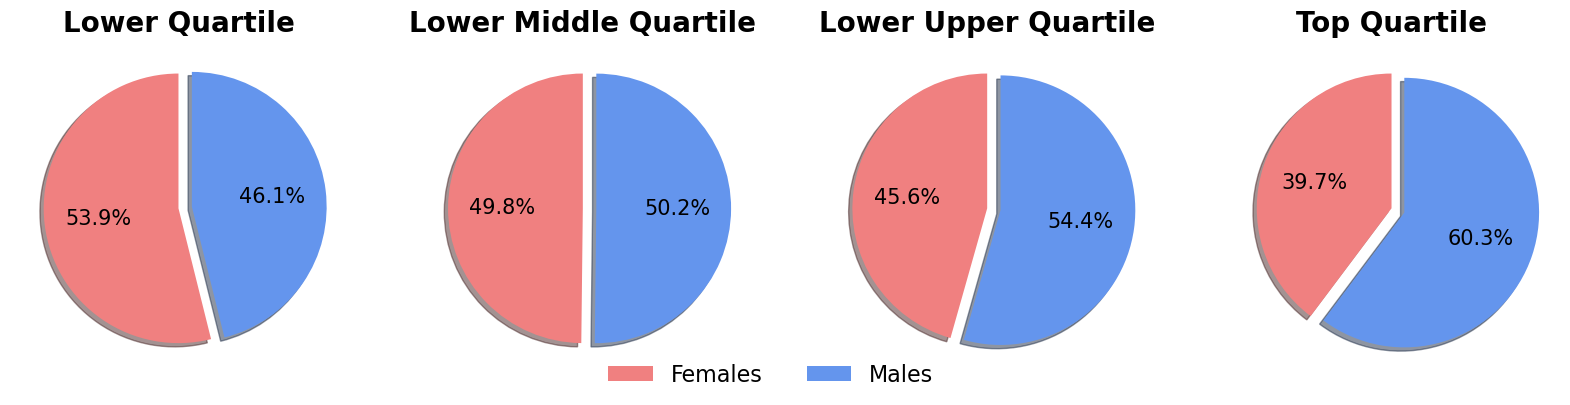

In [185]:
labels = 'Female', 'Male'
s1 = [female_q['FemaleLowerQuartile'],   female_q['MaleLowerQuartile']  ]
s2=[female_q['FemaleLowerMiddleQuartile'],   female_q['MaleLowerMiddleQuartile']]
s3=[female_q['FemaleUpperMiddleQuartile'],   female_q['MaleUpperMiddleQuartile']]
s4=[female_q['FemaleTopQuartile'],   female_q['MaleTopQuartile']] 
colors  = (  'lightcoral','cornflowerblue')

group_names = ['Females', 'Males']

explode = (0, 0.1)  # only "explode" the 2nd slice 

# create a figure with four subplots
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4,figsize=(20, 10))


ax1.pie(s1, explode=explode, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90,textprops={'fontsize': 15})

ax1.set_title('Lower Quartile', fontweight='bold',  fontsize='20')

ax2.pie(s2, explode=explode, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90,textprops={'fontsize': 15})

ax2.set_title('Lower Middle Quartile', fontweight='bold',  fontsize='20')
ax3.pie(s3, explode=explode, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90,textprops={'fontsize': 15})

ax3.set_title('Lower Upper Quartile', fontweight='bold',  fontsize='20')
ax4.pie(s4, explode=explode, autopct='%1.1f%%',colors=colors,
        textprops={'fontsize': 15}, shadow=True, startangle=90)

ax4.set_title('Top Quartile', fontweight='bold',  fontsize='20')

#plt.legend(group_names,loc=0, title="Gender", fontsize='16')
legend = plt.legend(group_names,loc=0,bbox_to_anchor=(-0.8, 0.1),  fontsize='16',frameon=False , ncol = 2) #

plt.setp(legend.get_title(),fontsize='15', weight='bold') #
plt.savefig('piechart')
plt.show()
